In [16]:
#loading up the libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#loading data
data = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

#Lets see what this data holds
data["Index"].unique()

array([4, 2, 3, 5, 1, 0], dtype=int64)

Text(0.5, 1.0, 'Data Visualisation')

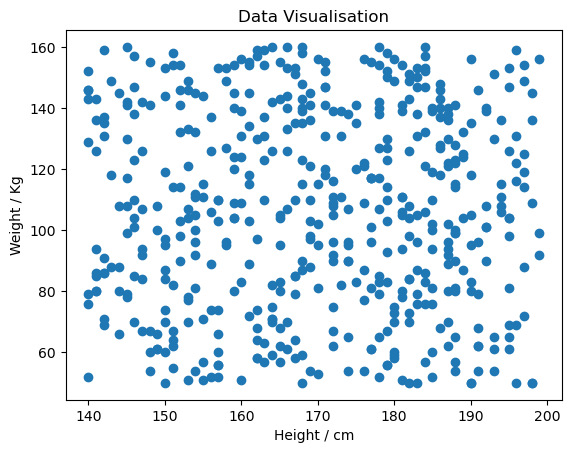

In [17]:
#visualising the data
plt.scatter(data["Height"], data["Weight"])

plt.xlabel("Height / cm")
plt.ylabel("Weight / Kg")
plt.title("Data Visualisation")

In [18]:
#Extracting only relevant data as input columns
X = data[["Height", "Weight"]]

In [19]:
#"K-means++ centroid selection" Implementation
def get_kmeans_pp_centroids(X1,k = 5):
    centroids = X1.sample()
    print(centroids)
    i = 1
    dist = []
    while i != k:
        max_dist = [0,0]
        #go through the centroids
        for index, row in centroids.iterrows():
            #calculate distance of every centroid with every other data point 
            d = np.sqrt((X1["Height"] - row["Height"])**2 +(X1["Weight"] - row["Weight"])**2)
            #check which centroid has a max distance with another point
            if max(d) > max(max_dist):
                max_dist = d

        X1 = pd.concat([X1, max_dist], axis = 1)
        idx = X1.iloc[:,i+1].idxmax()
        max_coor = pd.DataFrame(X1.iloc[idx][["Height", "Weight"]]).T
        centroids = pd.concat([centroids,max_coor])
        X1 = X1.drop(idx)
        i+=1
    return centroids

def k_means_fit(X,centroids, n = 5):
    #get a copy of the original data
    X_data = X
    diff = 1
    j=0

    while(diff!=0):
        #creating a copy of the original dataframe
        i=1

        #iterate over each centroid point 
        for index1,row_c in centroids.iterrows():
            ED=[]

            #iterate over each data point
            for index2,row_d in X_data.iterrows():
                #calculate distance between current point and centroid
                d1=(row_c["Height"]-row_d["Height"])**2
                d2=(row_c["Weight"]-row_d["Weight"])**2
                d=np.sqrt(d1+d2)

                #append distance in a list 'ED'
                ED.append(d)

            #append distace for a centroid in original data frame
            X[i]=ED
            i=i+1

        C=[]
        for index,row in X.iterrows():

            #get distance from centroid of current data point
            min_dist=row[1]
            pos=1

            #loop to locate the closest centroid to current point
            for i in range(n):

                #if current distance is greater than that of other centroids
                if row[i+1] < min_dist:

                    #the smaller distanc becomes the minimum distance 
                    min_dist = row[i+1]
                    pos=i+1
            C.append(pos)

        #assigning the closest cluster to each data point
        X["Cluster"]=C

        #grouping each cluster by their mean value to create new centroids
        centroids_new = X.groupby(["Cluster"]).mean()[["Weight","Height"]]
        if j == 0:
            diff=1
            j=j+1

        else:
            #check if there is a difference between old and new centroids
            diff = (centroids_new['Weight'] - centroids['Weight']).sum() + (centroids_new['Height'] - centroids['Height']).sum()
            print(diff.sum())

        centroids = X.groupby(["Cluster"]).mean()[["Weight","Height"]]
        
    return X, centroids

In [20]:
centroids = get_kmeans_pp_centroids(X, k = 4)
clustered, cent = k_means_fit(X, centroids, n= 4)

    Height  Weight
97     160     139
0.9076715719639594


C:\Users\Anton\AppData\Local\Temp\ipykernel_17464\3447646998.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


2.4216179503378257
5.3644938098440775
4.057880326162895
3.6016746833374
1.4197543052020194
1.230516619855635
0.09681462578546984
0.20508158612955185
0.5987384563354965
0.09018958216600481
0.5706140803965525
0.6144635660550364
1.280409191496716
2.168856155359279
1.3806734061376886
1.8312041778535075
0.8272997835498046
0.42017951467492765
0.0


Text(0, 0.5, 'Weight/ kg')

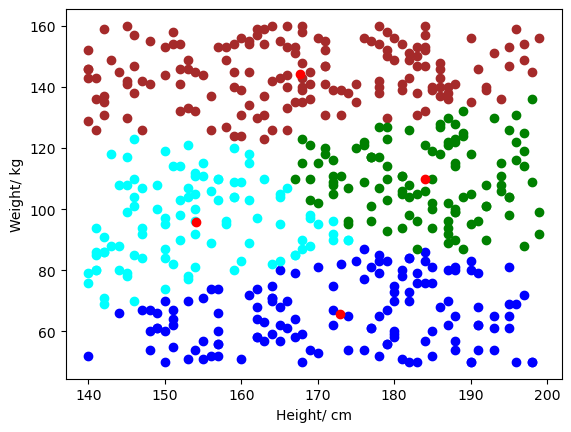

In [21]:
#setting color values for our 
color=['brown','blue','green','cyan']

#plot data
for k in range(len(color)):
    cluster=clustered[clustered["Cluster"]==k+1]
    plt.scatter(cluster["Height"],cluster["Weight"],c=color[k])
    
#plot centroids    
plt.scatter(cent["Height"],cent["Weight"],c='red')
plt.xlabel('Height/ cm')
plt.ylabel('Weight/ kg')